In [5]:
%pip install -q torch_snippets pytorch_model_summary

Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install pytorch-model-summary==0.1, pytorch-model-summary==0.1.1 and pytorch-model-summary==0.1.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [8]:
%pip install torch_snippets-<version>.tar.gz
%pip install pytorch_model_summary-<version>.tar.gz


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [9]:
import torch_snippets
import pytorch_model_summary


ModuleNotFoundError: No module named 'torch_snippets'

In [1]:
%pip install torch_snippets


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
from torch_snippets import *

In [3]:
import torch_snippets
import pytorch_model_summary


In [4]:
%pip install pycocotools

  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pycocotools (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\pycocotools
      copying pycocotools\coco.py -> build\lib.win-amd64-cpython-310\pycocotools
      copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-310\pycocotools
      copying pycocotools\mask.py -> build\lib.win-amd64-cpython-310\pycocotools
      copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-310\pycocotools
      running build_ext
      cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
      C:\Users\hp\AppData\Local\Temp\pip-build-env-6x6bg4dq\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later 

In [ ]:
%pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [ ]:
import os 

In [ ]:
import shutil
if os.path.exists('/content/flowers-recognition'):
  shutil.rmtree('/content/flowers-recognition')

In [ ]:
od.download(dataset_url)

100%|██████████| 225M/225M [00:06<00:00, 38.5MB/s]


In [ ]:
data_dir = '/content/flowers-recognition/flowers'

In [ ]:
os.listdir(data_dir)

['rose', 'sunflower', 'dandelion', 'tulip', 'daisy']

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

##Importing the dataset using pytorch

In [ ]:
from torchvision.datasets import ImageFolder

In [ ]:
dataset = ImageFolder(data_dir)

In [ ]:
len(dataset)  

4317

In [ ]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline




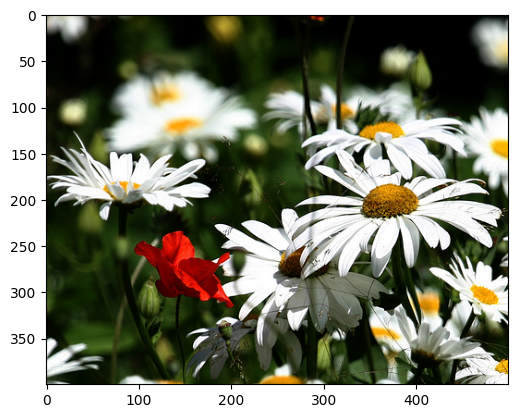

In [ ]:
img , label = dataset[5]
plt.imshow(img)

In [ ]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir,tt.Compose([tt.Resize(64),
                                           tt.RandomCrop(64),
                                           tt.ToTensor()]))

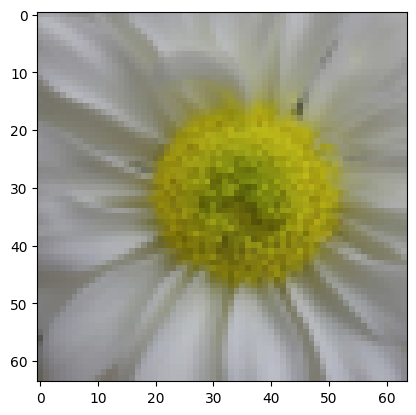

In [ ]:
img , label = dataset[0]
plt.imshow(img.permute((1,2,0)))

Splitting the dataset into two parts 

In [ ]:
val_pct = 0.1
val_size = int(val_pct*len(dataset))
train_size = len(dataset)-val_size

train_size,val_size

(3886, 431)

In [ ]:
from torch.utils.data import random_split

train_ds,valid_ds = random_split(dataset,[train_size,val_size])
train_size,val_size

(3886, 431)

In [ ]:
batch_size =128
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

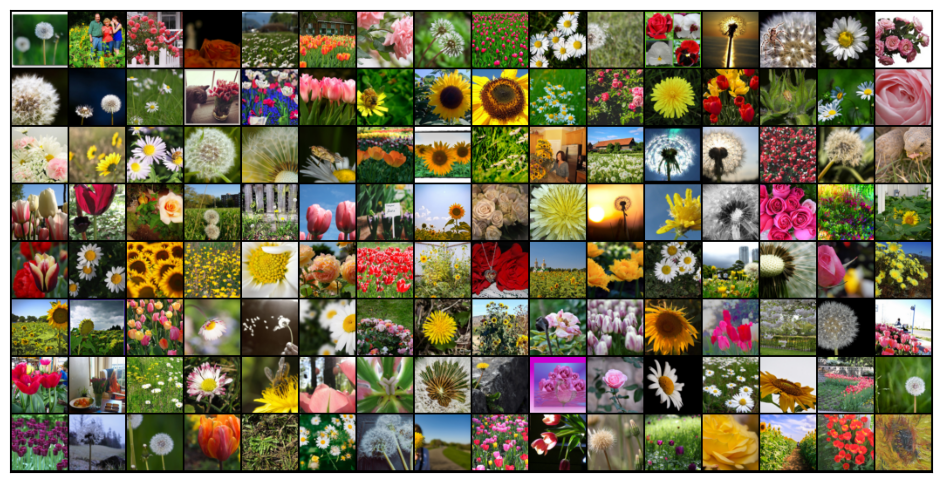

In [ ]:
show_batch(train_dl)

##GPU UTILITIES

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl , device)
valid_dl = DeviceDataLoader(valid_dl , device)

#Training and Validation

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## Model


In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### Passing one batch of input tensor through the model

In [ ]:
torch.cuda.empty_cache()

for batch in train_dl:
  images,labels=batch
  print('images.shape',images.shape)
  print('images.device',images.device)
  preds = model(images)
  print('preds.shape',preds.shape)
  break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 5])


##Training


In [ ]:
history = [evaluate(model,valid_dl)]
history

[{'val_loss': 1.6124374866485596, 'val_acc': 0.19118303060531616}]

In [ ]:
history += fit(5,0.001,model,train_dl,valid_dl,torch.optim.Adam)

Epoch [0], train_loss: 1.4828, val_loss: 1.7122, val_acc: 0.3499
Epoch [1], train_loss: 0.9609, val_loss: 0.9571, val_acc: 0.6385
Epoch [2], train_loss: 0.8636, val_loss: 0.8389, val_acc: 0.6976
Epoch [3], train_loss: 0.7995, val_loss: 0.8212, val_acc: 0.6883
Epoch [4], train_loss: 0.7019, val_loss: 0.7554, val_acc: 0.7481


In [ ]:
history += fit(5,0.001,model,train_dl,valid_dl,torch.optim.Adam)

Epoch [0], train_loss: 0.8694, val_loss: 0.8697, val_acc: 0.7083
Epoch [1], train_loss: 0.6978, val_loss: 0.7529, val_acc: 0.7484
Epoch [2], train_loss: 0.6064, val_loss: 0.8880, val_acc: 0.7170
Epoch [3], train_loss: 0.5550, val_loss: 0.7157, val_acc: 0.7517
Epoch [4], train_loss: 0.5226, val_loss: 0.5764, val_acc: 0.8108


In [ ]:
history += fit(5,0.0001,model,train_dl,valid_dl,torch.optim.Adam)

Epoch [0], train_loss: 0.3956, val_loss: 0.5374, val_acc: 0.8327
Epoch [1], train_loss: 0.3554, val_loss: 0.4601, val_acc: 0.8414
Epoch [2], train_loss: 0.3301, val_loss: 0.4868, val_acc: 0.8299
Epoch [3], train_loss: 0.3202, val_loss: 0.4762, val_acc: 0.8366
Epoch [4], train_loss: 0.3001, val_loss: 0.4900, val_acc: 0.8213


In [ ]:
history += fit(5,0.0001,model,train_dl,valid_dl)

Epoch [0], train_loss: 0.2860, val_loss: 0.4768, val_acc: 0.8347
Epoch [1], train_loss: 0.2844, val_loss: 0.4677, val_acc: 0.8375
Epoch [2], train_loss: 0.2728, val_loss: 0.4593, val_acc: 0.8521
Epoch [3], train_loss: 0.2801, val_loss: 0.4537, val_acc: 0.8520
Epoch [4], train_loss: 0.2793, val_loss: 0.4661, val_acc: 0.8366


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

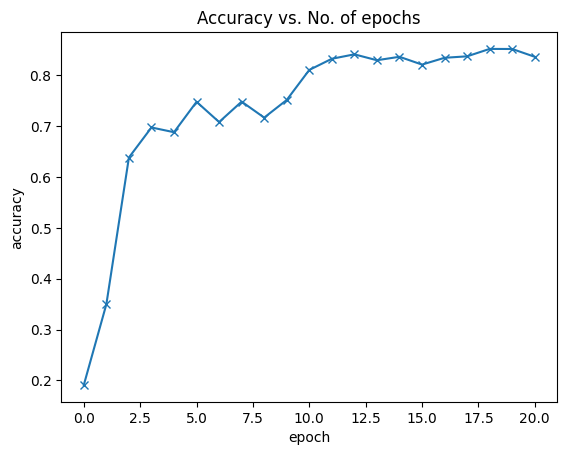

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

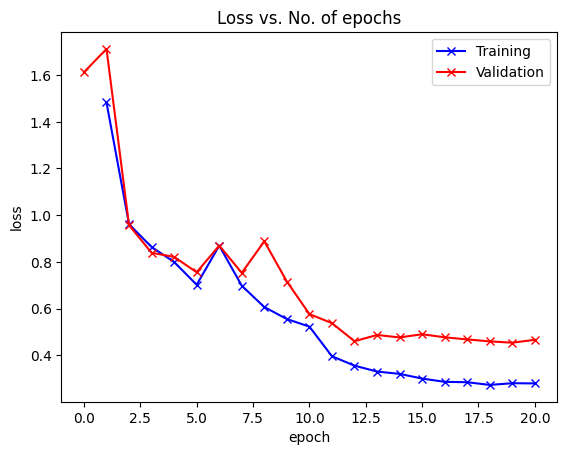

In [ ]:
plot_losses(history)

### Testing with individual images

In [ ]:
def predict_image(img, model,classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [ ]:
def show_img_pred(img,label):
  plt.imshow(img.permute(1, 2, 0))
  pred = predict_image(img,model,dataset.classes)
  print('Target:',dataset.classes[label])
  print('Prediction:',pred)


Target: tulip
Prediction: tulip


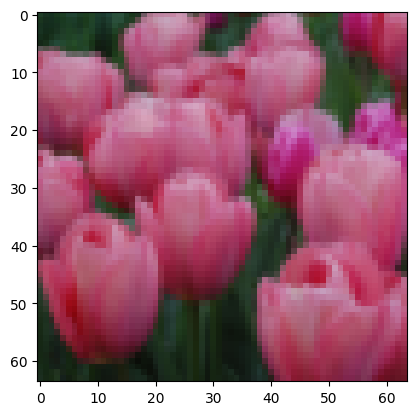

In [ ]:
show_img_pred(*valid_ds[0])


Target: daisy
Prediction: daisy


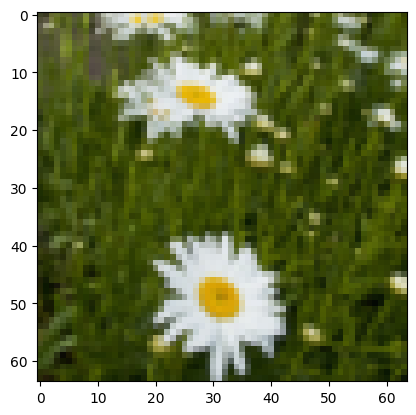

In [ ]:
show_img_pred(*valid_ds[70])


Target: tulip
Prediction: tulip


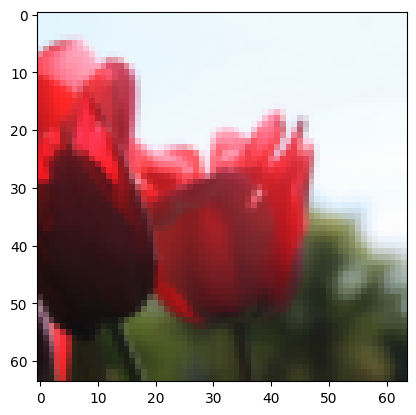

In [ ]:
show_img_pred(*valid_ds[110])


Target: dandelion
Prediction: dandelion


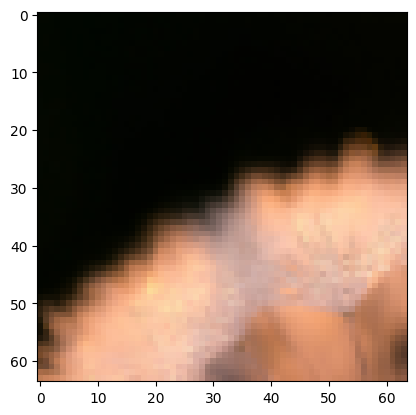

In [ ]:
show_img_pred(*valid_ds[97])


Transfer Learning 

In [ ]:
from torchvision import models

class ResNet34(ImageClassificationBase):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = to_device(ResNet34(len(dataset.classes),pretrained = True),device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torchvision.transforms as tt

img_size = 224
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
dataset = ImageFolder(data_dir,tt.Compose([tt.Resize(img_size),
                                           tt.RandomCrop(img_size),
                                           tt.ToTensor(),
                                           tt.Normalize(*imagenet_stats)]))


In [ ]:
from torch.utils.data import random_split

train_ds,valid_ds = random_split(dataset,[train_size,val_size])
train_size,val_size

batch_size =64
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)


In [ ]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(valid_dl,device)

In [ ]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ResNet34(len(dataset.classes),pretrained = True),device)

In [ ]:
history = [evaluate(model,valid_dl)]
history

[{'val_loss': 1.7962737083435059, 'val_acc': 0.187292218208313}]

In [ ]:
history += fit_one_cycle(15,0.001,model,train_dl,
              valid_dl,weight_decay=0.01,grad_clip = 0.1,opt_func=torch.optim.Adam)

  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.8358, val_loss: 0.8728, val_acc: 0.6908


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.7707, val_loss: 1.4508, val_acc: 0.6459


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.8057, val_loss: 2.5511, val_acc: 0.5403


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.8405, val_loss: 1.3105, val_acc: 0.5476


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.7857, val_loss: 0.9788, val_acc: 0.6289


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.7436, val_loss: 1.2957, val_acc: 0.5180


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.7087, val_loss: 0.9968, val_acc: 0.6110


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.6386, val_loss: 0.7771, val_acc: 0.7020


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.6219, val_loss: 1.1721, val_acc: 0.6257


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.5561, val_loss: 0.6393, val_acc: 0.7444


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.5323, val_loss: 0.5625, val_acc: 0.7849


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.4631, val_loss: 0.4922, val_acc: 0.8296


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.4079, val_loss: 0.4996, val_acc: 0.8229


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.3403, val_loss: 0.4674, val_acc: 0.8492


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.3250, val_loss: 0.4600, val_acc: 0.8385


In [ ]:
def predict_image(img, model,classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [ ]:
def show_img_pred(img,label):
  plt.imshow(img.permute(1, 2, 0))
  pred = predict_image(img,model,dataset.classes)
  print('Target:',dataset.classes[label])
  print('Prediction:',pred)

Target: sunflower
Prediction: sunflower


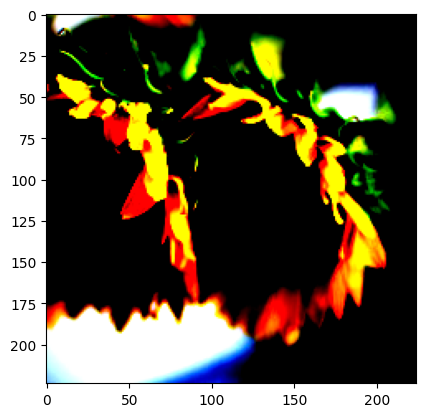

In [ ]:
show_img_pred(*valid_ds[0])

Target: dandelion
Prediction: dandelion


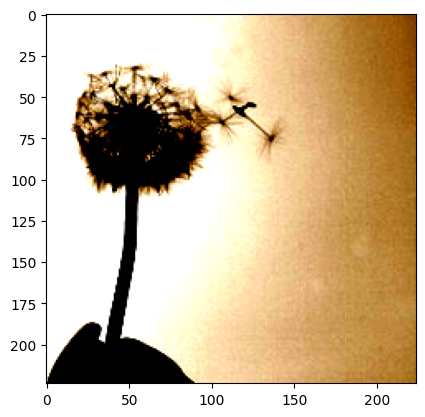

In [ ]:
show_img_pred(*valid_ds[6])

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

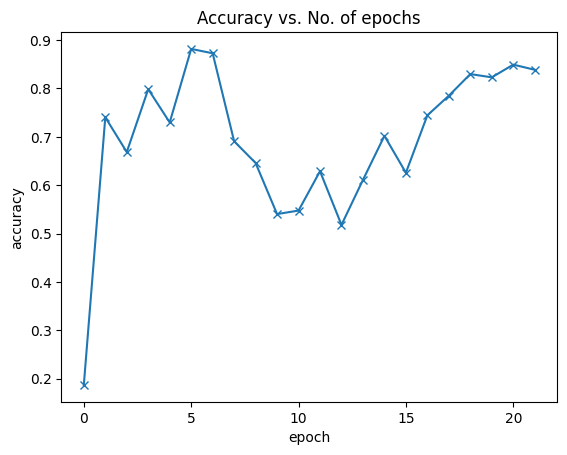

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

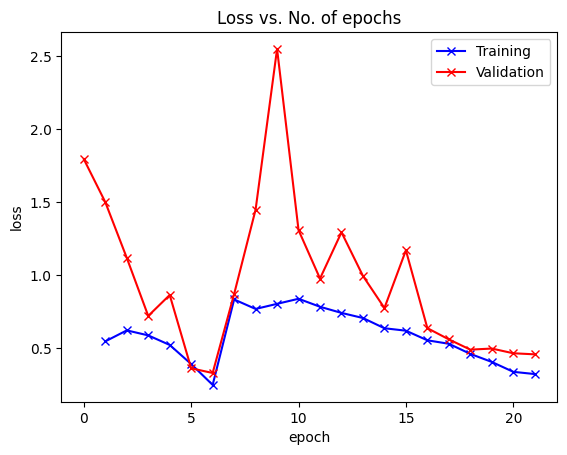

In [ ]:
plot_losses(history)